## Predicting Heart Disease Through Classification with Health Indicators

Yiyao Ru, 
Liam Sissons,
Nizel Abalos,
Sebastian Yeo

## Introduction

   “Heart disease” refers to a varying number of heart related conditions that may include arrhythmias, heart attack, or even heart failure. There are several risk factors that may contribute to the development of heart disease including unhealthy lifestyle, genetics, smoking, and more. In particular, high blood pressure and high cholesterol are main factors that may contribute to the development of heart disease (About heart disease 2022).
   
  Using the “Heart Disease Data Set” from UCI’s Machine Learning Repository, this data analysis explores the relationship between heart disease and several variables including cholesterol, age, maximum heart rate and rest/exercise induced ST depression using a classification model. These quantitative variables were chosen based on exploration of their relationships with heart disease risk through visualizations. The variables that showed a trend in relation to heart disease risk were chosen, while those that showed little variation in values between risk levels were dismissed. The specific data set from Cleveland was chosen due to the prevalence of heart disease related to lifestyle and health factors in the United States (U.S. health care from a global perspective, 2019: Higher spending, worse outcomes? 2020). The dataset includes health related test results collected from about 300 patients in Cleveland and originates from the Cleveland Clinic Foundation. 
  
  Each of the chosen variables is a health indicator which appears to influence risk level of heart disease. Cholesterol is a measurement of lipids in the blood, and age relates to years lived. Maximum heart rate looks at how high of a heart rate an individual can achieve, usually through exercise, and may indicate heart fitness. ST depression describes an abnormally low portion of the ST segment (area between QRS complex and T wave) on an electrocardiogram (ECG) reading (Rowden, 2022). ST depression may indicate several heart related health conditions. 
  
   A classification model was created which classifies the chosen variables to be used to predict heart disease risk. The data analysis and classification aims to answer the question: To what extent can the risk level of heart disease (no risk, low risk, or high risk) be predicted using the collected Cleveland data on health variables including cholesterol, age, maximum heart rate, and ST depression induced by rest/exercise?



## Methods and Results

Required libraries are loaded below.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The "Heart Disease Data Set" from the UCI Machine Learning Repository is read in as a csv file using the appropriate read function.

In [2]:
processed_cleveland_hd <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Column names are assigned to the unnamed columns based on those given by the UCI Machine Learning Repository and the data set is displayed in Table 1. Some of the column names are slightly modified to be more human readable.

In [3]:
colnames(processed_cleveland_hd) <- c("age", "sex", "chestpain", "rest_bloodpressure", "chol", "fast_sugar", "restecg", "maxhr", "ex_anigna", "st_depression", "slope", "num_vessels", "thal", "num")
head(processed_cleveland_hd)

age,sex,chestpain,rest_bloodpressure,chol,fast_sugar,restecg,maxhr,ex_anigna,st_depression,slope,num_vessels,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


_Table 1: Processed Data_

 Since K-nn classification does not work with categorical attributes, the values including sex, cp, restecg, fbs, slope, exang and thal are omitted. The quantitative variables are selected. The original data assigned risk levels from 0-4 based on risk level, with 0 being no indication of heart disease, and 4 being high risk. The risk categories of the dataset were mutated into three categories: no risk (0), low risk (1-2) and high risk (3-4). This was done to reduce the amount of risk categories (5 being too many) and to make these numbered risk levels easier to understand. The risk level was also mutated to be a factor and is displayed in the table below.

In [4]:
hd_selected <- processed_cleveland_hd |>
    mutate(risk = ifelse(num == 0, "No Risk", ifelse(num >= 3, "High Risk", "Low Risk"))) |>
    select(-num) |>
    mutate(risk = as_factor(risk), num_vessels = as.double(num_vessels), thal = as.double(thal))
head(hd_selected)

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `num_vessels = as.double(num_vessels)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


age,sex,chestpain,rest_bloodpressure,chol,fast_sugar,restecg,maxhr,ex_anigna,st_depression,slope,num_vessels,thal,risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,No Risk
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Low Risk
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Low Risk
37,1,3,130,250,0,0,187,0,3.5,3,0,3,No Risk
41,0,2,130,204,0,2,172,0,1.4,1,0,3,No Risk
56,1,2,120,236,0,0,178,0,0.8,1,0,3,No Risk


_Table 2: Cleaned Data_

The data is split into two groups: training and testing. Strata is assigned to be the column risk, which is what will be predicted. The split uses 75% of the data for training and 25% of the data for testing. The training data will be used to train the model. The model will then be tested on the testing data.

In [5]:
#Splitting the data into a training and testing data set
set.seed(4321)

hd_split <- initial_split(hd_selected, prop = 0.75, strata = risk)
hd_train <- training(hd_split)
hd_test <- testing(hd_split)

Data exploration is done to determine which variables will be the best for the classification model. The average values for each risk level are tabulated in order to better understand the distribution of points within each category.

In [8]:
hd_predictors_train <- hd_train |>
    group_by(risk) |>
    summarize(across(age:thal, mean))|>
    arrange(risk)

hd_observations <- hd_train |>
    group_by(risk) |>
    summarise(count = n())

hd <- merge(hd_predictors_train, hd_observations, on = "risk")

distinct(hd)

risk,age,sex,chestpain,rest_bloodpressure,chol,fast_sugar,restecg,maxhr,ex_anigna,st_depression,slope,num_vessels,thal,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
High Risk,58.11111,0.8611111,3.750000,133.5833,255.8889,0.1666667,1.4166667,135.1111,0.6111111,1.8694444,1.944444,1.555556,6.055556,36
Low Risk,56.72059,0.8382353,3.500000,134.8382,252.7206,0.1323529,1.0441176,141.8088,0.5000000,1.3102941,1.750000,NA,5.617647,68
No Risk,52.16260,0.5609756,2.772358,129.0732,243.0976,0.1219512,0.8617886,158.8455,0.1707317,0.6130081,1.447154,NA,3.764228,123


_Table 3: Data Means Explored_

Each variable is visualized to explore the relationship between the variable and each risk category further. The visualizations enable one to see the trend in risk associated with each variable. For example, as max heart rate increases, risk level tends to decrease. Lower ST depression appears to also relate to decreasing risk level. Cholesterol does not seem to display an especially strong trend, but testing showed that its inclusion improves the accuracy of the coming classification model. There seems to be little relationship between resting blood pressure and different risk levels, so this variable will not be used in the classification.

Warning message:
"Removed 6 rows containing non-finite values (`stat_density()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 4 rows containing missing values"
Warning message in gg

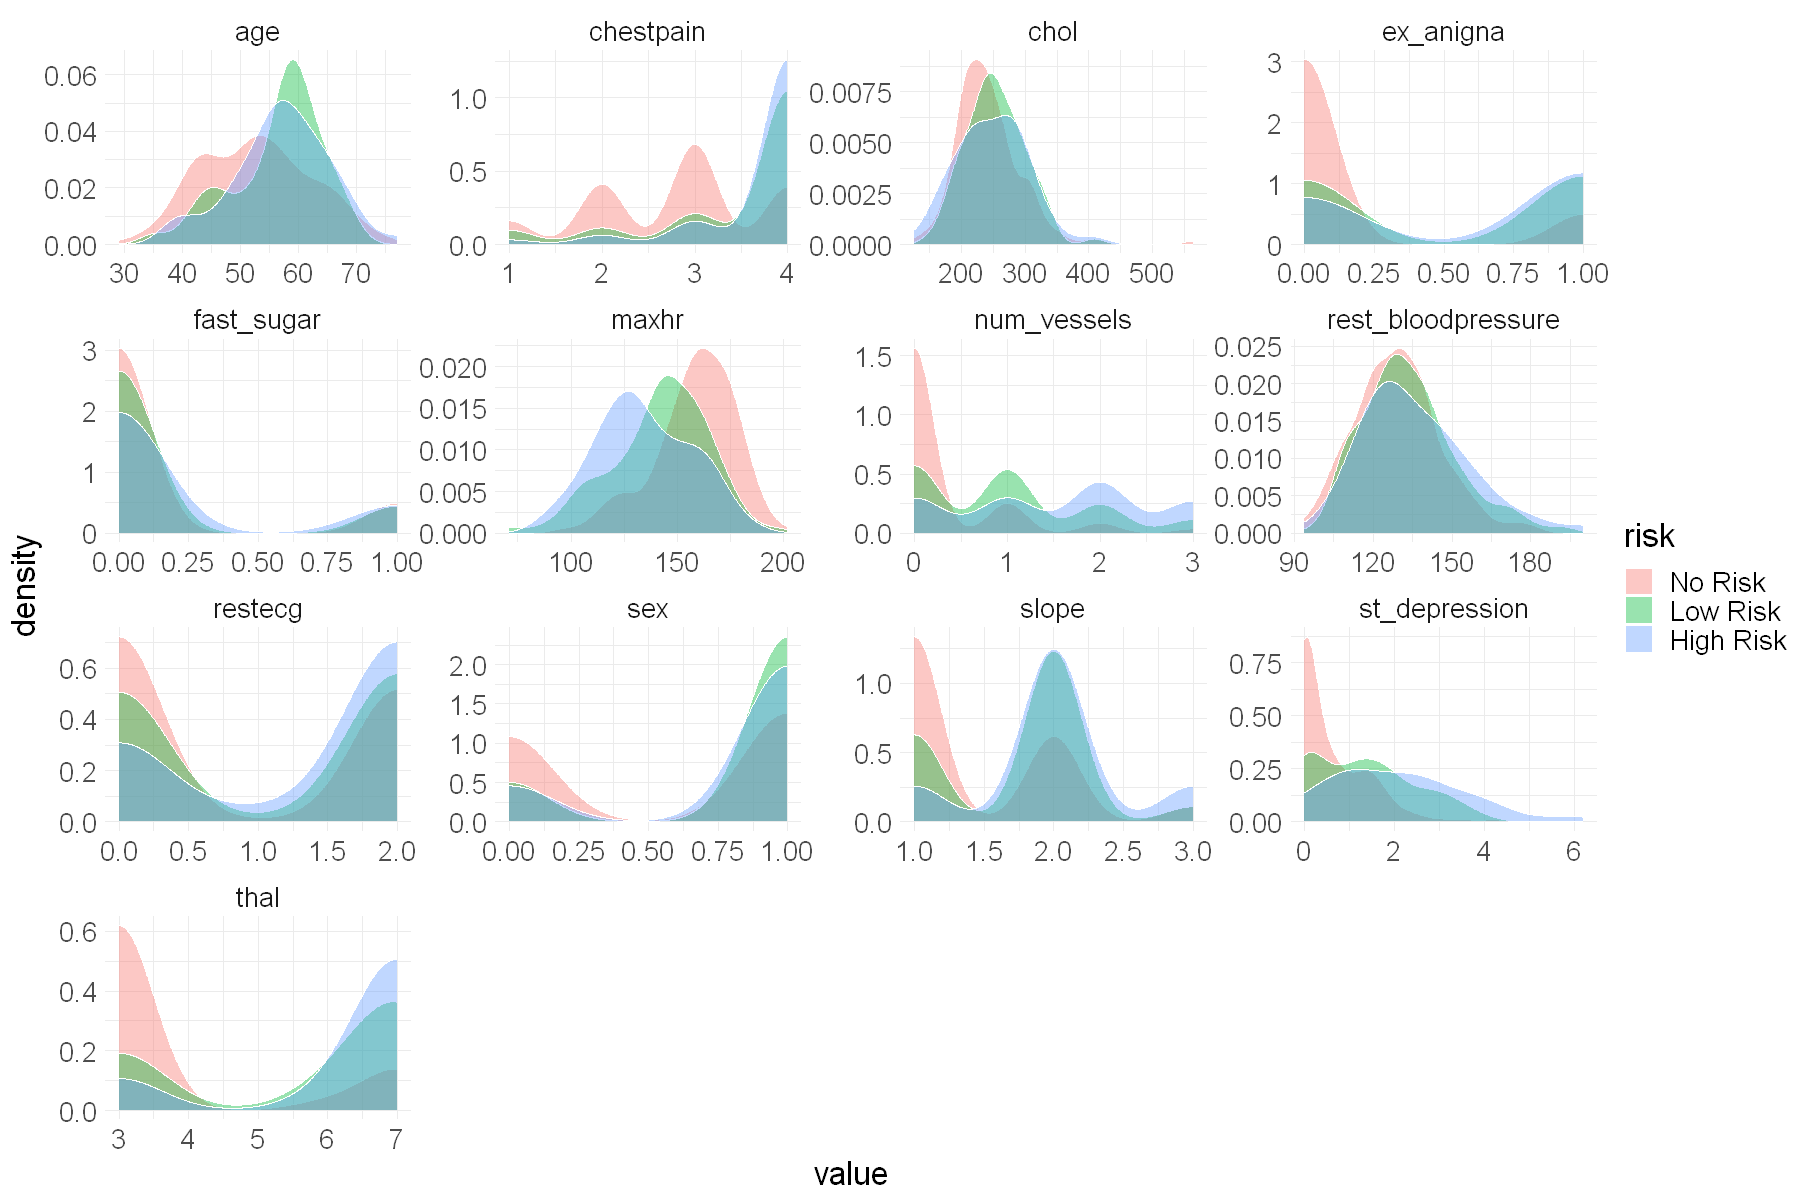

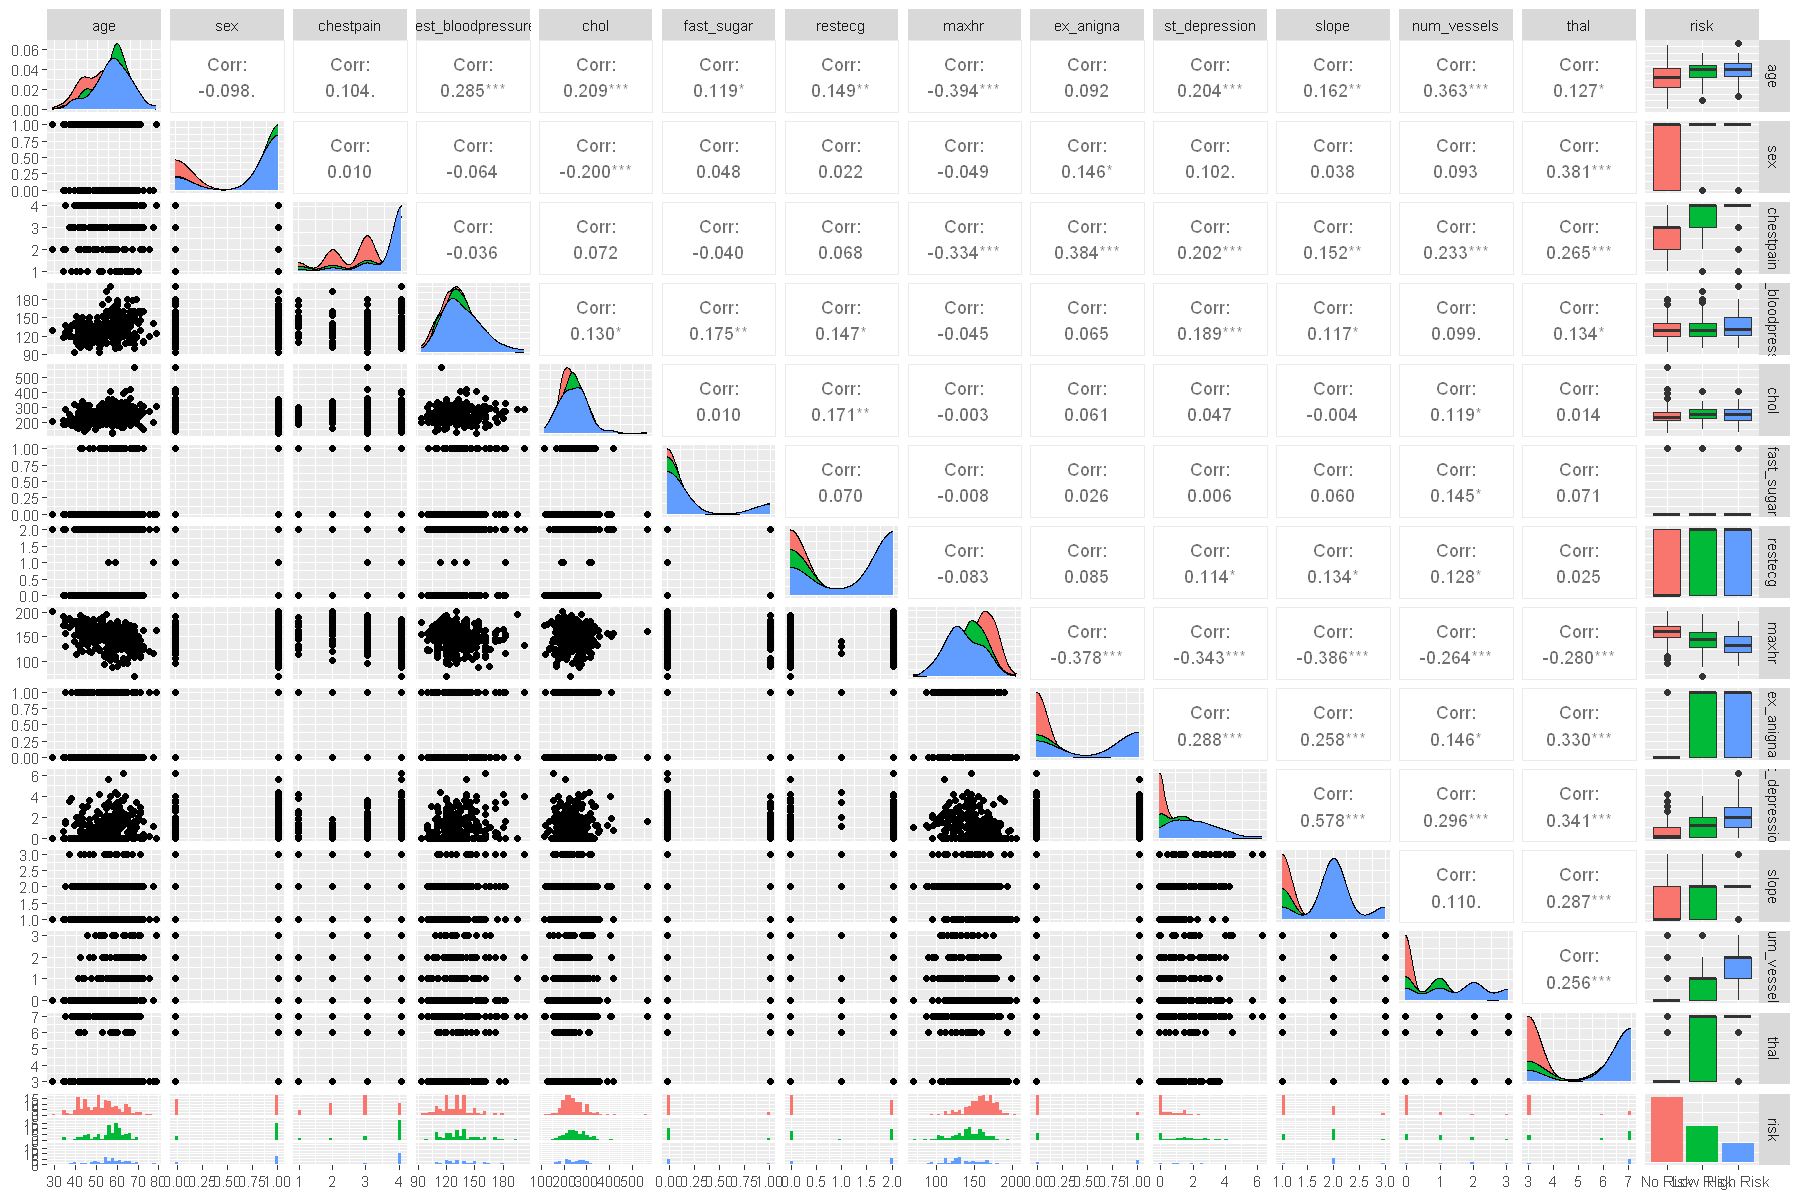

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)
hd_plot <- hd_selected |>
    pivot_longer(cols = -risk, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = risk)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))
hd_plot
hd_pairs <- hd_selected |>
    select(age, )
    ggpairs(aes(fill=risk))
hd_pairs

_Figure 1: Exploratory Visualizations_

The classification model is created below. A recipe assigns risk as a combination of the selected variables (age, ST depression, maximum heart rate and cholesterol) and the predictors are all scaled. Since the value of k might influence the accuracy of the model, various values of K are tested to determine the optimal k value using cross validation. 10 folds were used in the cross validation because that value produced the most precise results (less variation in K values). Finally, we filter for accuracy.

In [ ]:
set.seed(2022)
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))
hd_recipe <- recipe(risk ~ age + st_depression + maxhr + chol, data = hd_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
hd_vfold <- vfold_cv(hd_train, v = 10, strata = risk)
hd_tune <- workflow() |>
                  add_recipe(hd_recipe) |>
                  add_model(knn_tune) |>
                  tune_grid(resamples = hd_vfold, grid=k_vals) |>
                  collect_metrics()
hd_accuracies <- hd_tune |>
    filter(.metric == "accuracy")

A visualization of neighbors vs. accuracy estimate is produced in Figure 2 to identify the best K value. From the graph, the highest accuracy (above 60%) is acheived by a K value of 41.

In [ ]:
knn_plot <- ggplot(hd_accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20))
knn_plot

_Figure 2: Neighbors vs. Accuracy_

Using the best K value which was obtained above, the classification model is trained. Then, the predict function is used and the overall accuracy is displayed. As shown in Table 4, the best K value is 41 which will produce an accuracy of 60.53%.

In [ ]:
k_selected <- hd_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    select(neighbors) |>
    pull()
k_selected
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = k_selected) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_fit <- workflow() |>
    add_recipe(hd_recipe) |>
    add_model(knn_spec) |>
    fit(data = hd_train)
hd_predictions <- predict(knn_fit, hd_test) |>
  bind_cols(hd_test)
hd_predictions |>
  metrics(truth = risk, estimate = .pred_class) |>
  filter(.metric == "accuracy")

_Table 4: Accuracy of Classification Model_

A confusion matrix was created to look at the model's predictions. The model did not identify every risk category correctly, but it shows a general prediction ability with the majority of predictions for each category being correct.

In [ ]:
heart_conf_mat <- hd_predictions |>
conf_mat(truth = risk, estimate = .pred_class)
heart_conf_mat

_Table 5: Confusion Matrix for Classification Model_

## Discussion

## Works Cited

About heart disease. Centers for Disease Control and Prevention. (2022, July 12). Retrieved …March 2, 2023, from https://www.cdc.gov/heartdisease/about.htm 

Robert, D. Heart Disease Data Set. UCI Machine Learning Repository. Retrieved March 2, …2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

Rowden, A. (July, 2022). St depression on ECG: What it means and causes. Medical News …Today. from https://www.medicalnewstoday.com/articles/st-depression-on-ecg 

U.S. health care from a global perspective, 2019: Higher spending, worse outcomes? U.S. Health …Care from a Global Perspective, 2019 | Commonwealth Fund. (2020, January 30). Retrieved …March 2, 2023, from …https://www.commonwealthfund.org/publications/issue-briefs/2020/jan/us-health-care-global-p…erspective-2019#:~:text=More%20than%20one%2Dquarter%20of,less%20in%20all%20other…%20countries 
